In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
from statsmodels import regression, stats, tsa
from statsmodels.regression.rolling import RollingOLS
sns.set()

# Statistical Arbitrage - Stock Pair Trading Strategy

### Abstract

We will explore a simple strategy called **stock pair trading strategy** which falls under the class of **statistical arbitrage** strategies. It is a good place to start in **algorithmic (or quantitative) trading**. First, we will look into the underlying theory and concepts that go behind a pairs trading strategy. Then we will look into the implementation of the strategy. Finally, we analyze the results and arrive at conclusion followed by few thoughts for further consideration.

## Contents

1. <a href='#Underlying theory'>Underlying theory</a>
2. <a href='#Implementation'>Implementation</a>
3. <a href='#Results and conclusion'>Results and conclusion</a>
4. <a href='#Further considerations'>Further considerations</a>

## 1. Underlying theory
<a id='Underlying theory'></a>

### Arbitrage

1. Arbitrage is a situation / opportunity where one can make a certain **risk-free** positive profit
2. A common example is - dual listing arbitrage
 * For instance, a stock might be listed on multiple exchanges. Whenever there is a mismatch in the pricing of that stock on exchanges, one can earn a risk-free profit by entering into a trade where they buy the stock from the exhange where the price is lower and simultaneously sell it on another exchange where the stock is trading at a higher price. The profit will be the price differential
3. In real world, such risk-free opportunities are short lived and the **transaction costs** might be bigger than the price differential
4. Therefore, in real world, market participants make use of statistics to find some sort of (relatively unknown) mispricing between a group of assets
5. This practice of using statistics to find arbitrage opportunities leads us to our next concept - statistical arbitrage
6. One way statistical arbitrage differs from pure arbitrage is that former involves some amount of **risk** i.e. they are not risk-free
7. The risk can be very high especially when the underlying statistical models are flawed

### Statistical Arbitrage (Stat-Arb)

1. Stat-Arb is a technique of utlilizing statistics to find mispricings between similar assets and exploiting them systematically
2. A trading strategy built around stat-arb involves - 
 * A measure of similarity of assets, 
 * A measure of pricing mismatch and 
 * An algorithm / strategy to trade the mispricing
3. **Pairs trading** falls under the class of stat-arb strategies
4. For a Pairs trading strategy, **long-short** positions are a pair of strongly "similar" assets and **spread** is a measure of "pricing mismatch"
5. The **covariance** (or **correlation**) between two assets is a widely used metric of their similarity
6. However, recently methods like **co-integration** tests are used to select asset pairs that are better suited for a stat-arb trading strategy
7. Stat-Arb is used by many market participants like **hedge funds** and **investment banks** (ofcourse, with extra level of sophistication)

### The risk in stat-arb

1. Stat-Arb depends heavily on the ability of a relationship to return to a historical or predicted normal
2. However, there is no gurantee that past relationship will continue to exist as is in the future. Historical results do not guarantee future results
3. Various market events and economic factors can temporarily or permanently modify the relationship rendering the past model as ineffective
4. For Pairs trading to be effective, the spread needs to revert to its mean (individual stocks may or may not **mean revert** to their respective means)

### Pairs Trading

1. A strategy that aims to identify pairs of stocks (or other asset classes like **ETFs**) whose prices have historically moved together
2. Generally, the pairs are identified within a sector as some 2 stocks from a same sector are likely to have an economic link that relates their movement
3. When the spread between the two components of the pair significantly widens, the strategy sells the best performing security to buy the laggard
4. If the spread reverts to the mean the trade will be profitable regardless of market trends
5. This strategy relies on the assumption of a (long-term) equilibrium in the investigated spreads
6. These spreads can be detected through a variety of statistical methods. In our case we will do it through co-integration
7. Long - short positions can be combined in a (**hedge**) ratio which makes the trade **market-neutral** (neutral beta position wrt market) or **dollar-neutral**
8. This makes us indifferent to the direction in which the market moves. We make or lose money because of the relative moment of the pair

### Correlation (Pearson) $\rho$

1. Quantifies the extent of linear relationship bewteen two variables. It ranges from $-1$ to $+1$

### Co-integration

1. A statistical property of two or more **time-series** which indicates if a linear combination of these time-series is **stationary**
2. Non-stationary series have an **order of integration** $I(d)$ > 0
3. Order of integration $I(d)$ is a statistic of a time series, which denotes the number of differences required to make the time series stationary
4. A stationary time series has $I(d) = 0$. The opposite is not necessarily true though
5. Statistical properties like **mean**, **variance** etc. are not a function of time for a stationary time-series
6. Therefore, a stationary time series will be **mean reverting** in nature, i.e. it will tend to return to its mean after some fluctuations around the mean
7. Stock prices generally are non-stationary because their means and other statistical properties change with time

### Why co-integration is useful in pairs trading?

1. If 2 stocks Y and X are co-integrated, then it implies that a linear combination of these two stocks is stationary
2. For instance, if Y $-$ $n$X is cointegrated, this suggests that the mean and variance of this equation remains constant over time
3. $n$ is called the **hedge ratio**
4. Due to stationarity, $EV$(spread) = 0; spread = Y $-$ $n$X
5. Any significant deviation from this expected value is a case for statistical abnormality, hence a case for pairs trading!

### Why use co-integration over correlation to find the pair of stocks to trade?

1. Both co-integration and correlation can measure how asset prices move together and establish a relationship, but there is an issue with correlation
2. Correlation is somewhat robust in identifying short-term relationships but breaks down on the long-term
 * A pair of assets that may have $-0.2$ correlation over a long period can have $+0.8$ correlation over another long period
 * Major reason why the correlation may break down is that the calculated correlation may be spurious
 * **Spurious** relations have poor predictive abilities. Spurious relations may arise by coincidence or from **confounding variable**
3. Meanwhile, co-integration is a much better fit for medium to long-term trading strategy
4. Also, correlations are mostly used to specify the co-movement of returns whilst co-integration specifies that of price



### How co-integration is tested?

1. We run an **OLS** between our two time series (Y, X) to get the coefficient $n$ of linear combination that might make the combined series stationary 
2. The combination Y $-$ $n$X (also equal to **residuals** of this OLS) should be stationary **white noise**
3. We check the stationarity using **Augmented Dickey Fuller (ADF)** test. This test checks for the presence of a **unit root** in the time series
4. This method of using a **linear regression** to estimate the coefficient $n$ and testing stationarity of residuals is known as the **Engle-Granger** method
5. **statsmodels.tsa.stattools.coint** uses the augmented Engle-Granger method

### Why (generally) pick the pair of stocks from a same sector or industry?

1. When we pick a pair of stocks from the same sector or industry, it is likely that they have an economic link which will continue into the future
2. This implies that the relationship is likely not spurious i.e. not coincidental or driven by a confounding variable
3. Spurious relationships are likely to break down in future

### Spread

1. It is one way of measuring the pricing mismatch
2. Spread = log(Y) $– n$log(X), where ‘Y’ and ‘X’ are prices of stocks Y and X respectively; $n$ is the hedge ratio
3. According to [**Ernst Chan's blog**](http://epchan.blogspot.com/2013/11/cointegration-trading-with-log-prices.html) calculating spread without **log** i.e. Spread = Y $– n$X, also works fine. We will be using this in our implementation
4. For each stock of Y bought, we have sold $n$ stocks of X
5. $n$ is calculated using OLS linear regression between Y's price (dependent variable) and X's price (independent variable)
6. Spread is also equal to the residual of this OLS
7. As a sanity check, we confirm stationarity of this spread using the ADF test

_**Note**: After running an OLS linear regression, one should -_ 
 * _Evaluate **p-values** and **test statistics** of coefficients to see if they are **statistically significant**_
 * *Check if all **assumptions** have been satisfied otherwise coefficient estimates may become **biased** or **inefficient** and **standard errors** become invalid*
 * *We can use **non-stationary** data in OLS regression if series are **co-integrated**.* *See [**Pg 63 of Reed's lecture notes**](https://www.reed.edu/economics/parker/312/tschapters/S13_Ch_4.pdf) for reference*
 
| Assumption | Tests | Issues upon violation |
| :- | :- | :- |
| Homoskedasticity | Breusch-Pagan / White's test | Coeff. estimates remain **unbiased**; **Std errors** and (hence) **test statistics** become unreliable | 
| Auto-correlation | Durbin-Watson, Ljung Box | Coeff. estimates remain unbiased but become **inefficient**; Std errors become unreliable |
| Normal distribution | Jarque-Bera, Normal quantile-quantile (q-q) plot | Coeff. estimate remain unbiased and **efficient** but can't make valid inferences (fine if **sample size** is large) |
| Stationarity | Augmented Dickey Fuller | Spurious regression (fine if series are co-integrated) |



### Using continuously updated statistics
1. In general taking a statistic over whole sample size is not good 
2. A statistic calculated over a long time period may not be an optimal estimate of current population parameter
3. To keep all our estimates up to date, we will use - 
 * **Rolling** OLS regression to continually update our **hedge ratio** and subsequently the **spread** also becomes dynamic
 * Rolling $z$-score of this dynamic spread


### Algorithm / Strategy

1. Go long on the spread when the $z$-score of moving average spread is below $-2.0$. We do this by longing Y and shorting $n$ of X
2. Short the spread when the $z$-score of moving average spread is above $+2.0$. We do this by shorting Y and longing $n$ of X
3. Exit the positions when the $z$-score approaches zero
2. $n$ is the hedge ratio which continually gets updated by rolling OLS regression between Y's price and X's price

## 2. Implementation
<a id='Implementation'></a>

### Stock universe for identification of co-integrated pairs of stocks

We will be taking Power sector in the US as our universe. This is the sector I covered during my time at JPMorgan (*a little walk down the memory lane!*).

We will include the market i.e. **S&P 500** in our universe. This is because stocks are generally driven by general market factors in addition to stock specific factors. Therefore, we might find pair of stocks that seem related but in reality both of them would be driven by a **confounding variable** - the market, which will result in spurious relationship.

| No. | Company Name | Ticker |
| :- | :- | :- | 
| 1 | S&P 500 ETF (*market*) | SPY |
| 2 | NextEra Energy | NEE |
| 3 | Sempra Energy | SRE |
| 4 | Exelon Corporation | EXC |
| 5 | Duke Energy | DUK |
| 6 | Southern Company | SO |
| 7 | First Energy | FE |
| 8 | American Electric Power | AEP |
| 9 | Dominion Energy | D |
| 10 | Edison International | EIX |
| 11 | PPL Corporation | PPL |
| 12 | Entergy Corporation | ETR |
| 13 | Xcel Energy | XEL |
| 14 | Consolidated Edison | ED |
| 15 | DTE Energy | DTE |
| 16 | Centerpoint Energy | CNP |
| 17 | Ameren Corporation | AEE |

### Get data

We will use **yfinance** package to pull data from yahoo finance. We will use **adjusted closing price**. Our time period will be $2015.01.01$ to $2019.12.31$

In [2]:
# get data from yfinance as pandas DataFrame

# date range
start_date = '2015-01-01'
end_date = '2019-12-31'

# ticker list of select companies in Power sector in the US + S&P 500 as market
ticker_list = ['SPY', 'NEE', 'SRE', 'EXC', 'DUK', 'SO', 'FE', 'AEP', 'D', 'EIX', 'PPL', 'ETR', 
               'XEL', 'ED', 'DTE', 'CNP', 'AEE']

# pull adj close data for the above companies as a DataFrame
price_data_df = yf.download(tickers = ticker_list, start = start_date, end = end_date)['Adj Close']

price_data_df.tail(5)

[*********************100%***********************]  17 of 17 completed


,AEE,AEP,CNP,D,DTE,DUK,ED,EIX,ETR,EXC,FE,NEE,PPL,SO,SPY,SRE,XEL
Date,,,,,,,,,,,,,,,,,
2019-12-23,72.727989,89.194801,25.503290,76.767982,122.842308,84.670052,84.617790,70.043694,112.419960,42.739315,45.277607,57.877655,32.743652,59.389725,314.301849,143.041077,60.559509
2019-12-24,72.833763,89.280418,25.531914,76.701988,122.269890,84.745186,84.514107,70.053055,113.244843,42.852779,45.361813,58.296986,32.706924,59.267681,314.311646,143.126572,60.796471
2019-12-26,72.727989,89.318466,25.675032,76.796257,122.641960,84.895462,84.495262,70.549278,113.320686,42.852779,45.389889,58.648453,32.624283,59.305225,315.984802,144.048141,60.728771
2019-12-27,73.362579,89.613419,25.675032,77.305344,122.956802,85.440201,84.768593,70.427567,113.643051,42.937874,45.277607,58.781769,32.615105,59.577488,315.906494,144.256592,61.047935
2019-12-30,73.612572,89.461189,25.675032,77.380775,123.090363,85.271141,85.004219,70.548431,113.093132,42.909512,45.371174,58.486053,32.752834,59.464832,314.164856,144.428696,61.212353


### Share price chart to get a sense of trend and movement in this time period

Before we get into correlation and co-integration, let's plot a share price graph of few companies and S&P 500 market to get a sense of how they have moved in this time period. Let's plot SPY, NEE, AEP, ED and CNP. We will re-base the prices to $100 to get a sense of relative movement.

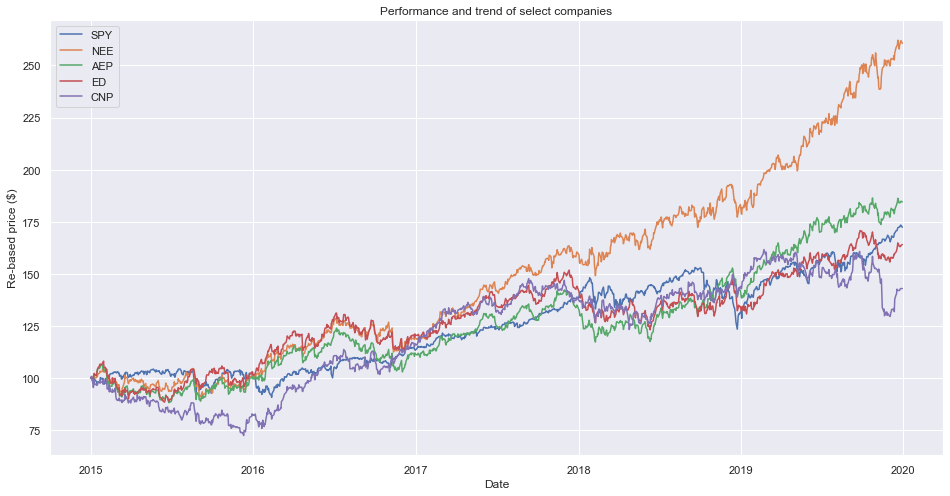

In [3]:
# share price chart

plt.figure(figsize = (16, 8))

# we will re-base the prices to 100 to get an idea of relative movement / performance
plt.plot(100 * price_data_df['SPY'] / price_data_df['SPY'][0], label = "SPY")
plt.plot(100 * price_data_df['NEE'] / price_data_df['NEE'][0], label = "NEE")
plt.plot(100 * price_data_df['AEP'] / price_data_df['AEP'][0], label = "AEP")
plt.plot(100 * price_data_df['ED'] / price_data_df['ED'][0], label = "ED")
plt.plot(100 * price_data_df['CNP'] / price_data_df['CNP'][0], label = "CNP")

plt.ylabel("Re-based price ($)")
plt.xlabel("Date")
plt.title("Performance and trend of select companies")
plt.legend();

Except NEE (which has outperformed), rest others have roughly moved somewhat similar to the market - S&P 500.

### Correlation to get basic idea of relationship

We discussed in <a href='#Underlying theory'>Underlying theory</a> section that correlation may not be as much robust as compared to co-integration but let's get the correlation matrix to get a sense of relationship between these companies. We will use **seaborn's heat map** for a nice visualization.

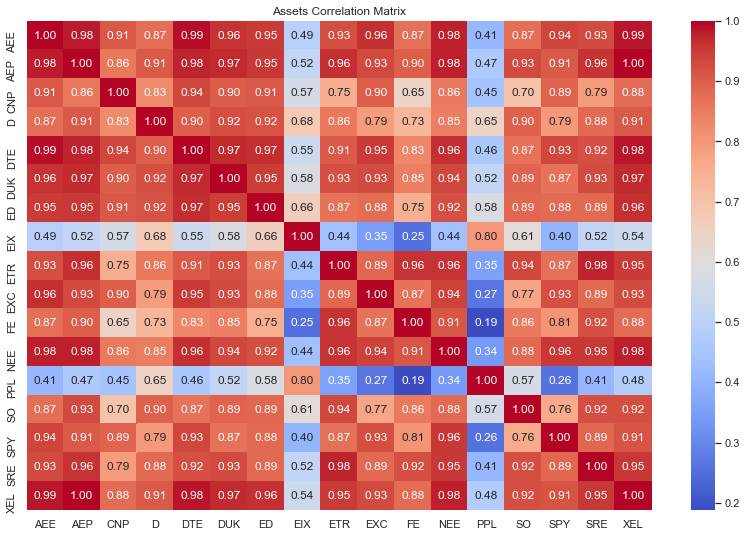

In [4]:
# Pearson correlation matrix using seaborn to get the basic idea about the relationship

plt.figure(figsize = (14, 9))
sns.heatmap(price_data_df.corr(method = 'pearson'), cmap = 'coolwarm', annot = True, fmt = ".2f")
plt.title('Assets Correlation Matrix');

We can see that correlations are really high $( > 0.75)$ between most of the pairs. We can expect this because Power sector in the US is highly regulated. Therefore, any impact to the sector generally is reflected across all companies in a similar fashion.

### Finding co-integrated pairs in our universe 

1. We will use **statsmodels.tsa.stattools.coint** to check for co-integration
2. We have described its working in brief in <a href='#Underlying theory'>Underlying theory</a> section
3. It uses augmented Engle-Granger method
4. The function uses **hypothesis testing** to test for co-integration. **Null Hypothesis** **($H_o$)** is no co-integration 
5. Throughout this notebook we will use **significance level** $(\alpha)$ = $0.05$ as our cut-off for **p-values**

_**Note**: It is always good to have some level of **skepticism** towards output of these hypothesis test and to not to take the results as the ultimate truth._

Following is a function to build a p-value matrix for all the possible pairs and separately store the pairs with p-values $< 0.05$

In [5]:
cut_off = 0.05                                        # p-value cut-off

In [6]:
# function to build a p-value matrix for the pairs and separately store the co-integrated pairs

def co_integrated_pairs(data, cut_off):
    
    n = data.shape[1]                                 # number of companies
    p_value_matrix = np.ones((n, n))                  # initialize the N x N p-value matrix
    columns = data.columns                            # get list of all tickers (column names)
    pairs = []                                        # empty co-integrated pairs list
    for i in range(n):                   
        for j in range(i + 1, n):                     # for all (17 choose 2) pairs
            result = tsa.stattools.coint(data[columns[i]], data[columns[j]])         # store test results
            p_value_matrix[i, j] = result[1]          # assign p-value to the p-value matrix
            if result[1] < cut_off:                   # if p-value less than cut-off, append the pair to pairs
                pairs.append((columns[i], columns[j]))      
    return p_value_matrix, pairs

Now, we will run the above function and plot the p-value matrix heatmap using seaborn to get a visual sense of which pairs are co-integrated.

AEP and XEL are likely co-integrated
DUK and XEL are likely co-integrated
EIX and PPL are likely co-integrated
ETR and SRE are likely co-integrated


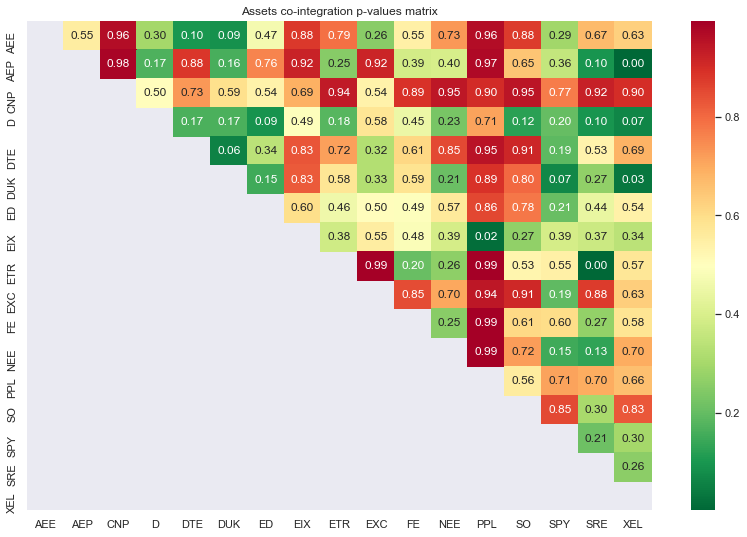

In [7]:
# calculate p-values and plot as a heatmap

p_values, pairs = co_integrated_pairs(price_data_df, cut_off)         # call the above defined function

for x in pairs:                                                       # print the pairs
    print(f"{x[0]} and {x[1]} are likely co-integrated")

plt.figure(figsize = (14, 9))                                         # plot the heat map
sns.heatmap(p_values, xticklabels = price_data_df.columns, yticklabels = price_data_df.columns, 
            cmap = 'RdYlGn_r', annot = True, fmt=".2f", mask = (p_values > 0.9999))
plt.title('Assets co-integration p-values matrix');

Sweet! we can see that out of the 16 companies (and S&P 500) we have 4 pairs that are **_likely_** co-integrated. Let's see which pair of these filtered pairs has the maximum correlation, we will pick that pair for our pairs trading strategy!

So below is the function to extract correlation of these qualified pairs and find the pair with maximum correlation.

In [8]:
# get correlation b/w filtered pairs and then extract the pair with max correlation

def extract_correlation(pairs):
    
    correlation_dict = {}                                          # initialize a correlation dict
    
    for x in pairs:
        correlation_dict[(x[0], x[1])] = price_data_df[x[0]].corr(price_data_df[x[1]])    # store correlation
        print(f"Correlation between {x[0]} and {x[1]} is: {correlation_dict[(x[0], x[1])]:.3f}")
    
    max_correlation = np.max(list(correlation_dict.values()))      # find the max correlation

    for x in correlation_dict:                                     # find pair with max correlation
        if correlation_dict[x] == max_correlation:
            return x 

stock_2, stock_1 = extract_correlation(pairs)      # call the func and store tickers of pair with max correl

print(f"We will use Stock 1: {stock_1} and Stock 2: {stock_2} in our stock pairs trading strategy")

Correlation between AEP and XEL is: 0.997
Correlation between DUK and XEL is: 0.969
Correlation between EIX and PPL is: 0.802
Correlation between ETR and SRE is: 0.978
We will use Stock 1: XEL and Stock 2: AEP in our stock pairs trading strategy


Great! Now that we have found our pair - AEP and XEL, let's carry out the next steps

### AEP and XEL share price plot to get a visual sense of their co-movement

We will plot AEP's and XEL's share price evolution (absolute and re-based) to get a sense of the co-movement of our selected pair. 

Going forward in this notebook, remember that
1. stock_1 = XEL = X (independent variable)
2. stock_2 = AEP = Y (dependent variable)

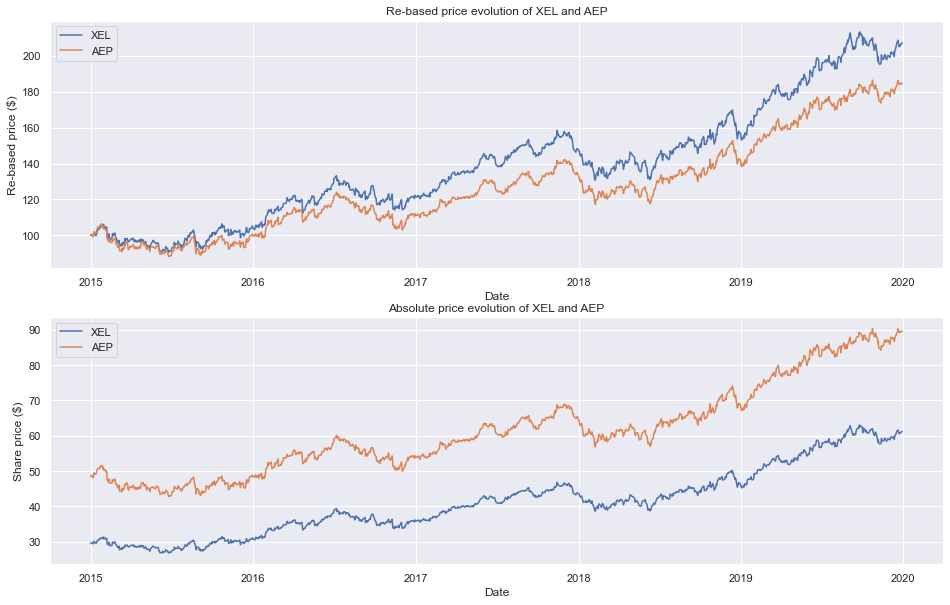

In [9]:
# share price chart

plt.figure(figsize = (16, 10))

# plot 1: re-based plot
plt.subplot(2, 1, 1)         # row, column, index
plt.plot(100 * price_data_df[stock_1] / price_data_df[stock_1][0], label = stock_1)
plt.plot(100 * price_data_df[stock_2] / price_data_df[stock_2][0], label = stock_2)
plt.ylabel("Re-based price ($)")
plt.xlabel("Date")
plt.title(f"Re-based price evolution of {stock_1} and {stock_2}")
plt.legend();

# plot 2: absolute plot
plt.subplot(2, 1, 2)
plt.plot(price_data_df[stock_1], label = stock_1)
plt.plot(price_data_df[stock_2], label = stock_2)
plt.ylabel("Share price ($)")
plt.xlabel("Date")
plt.title(f"Absolute price evolution of {stock_1} and {stock_2}")
plt.legend();

Visually it looks that AEP's and XEL's share price co-movement has been highly correlated throughout our time period.

### Calculate the hedge ratio to be used in spread using OLS linear regression

We will take AEP's price as Y (dependent variable) and XEL's price as X (independent variable). We will run the OLS regression using **statsmodels**.

                            OLS Regression Results                            
Dep. Variable:                    AEP   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.995e+05
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:32:42   Log-Likelihood:                -1776.8
No. Observations:                1258   AIC:                             3558.
Df Residuals:                    1256   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2824      0.124     58.563      0.0

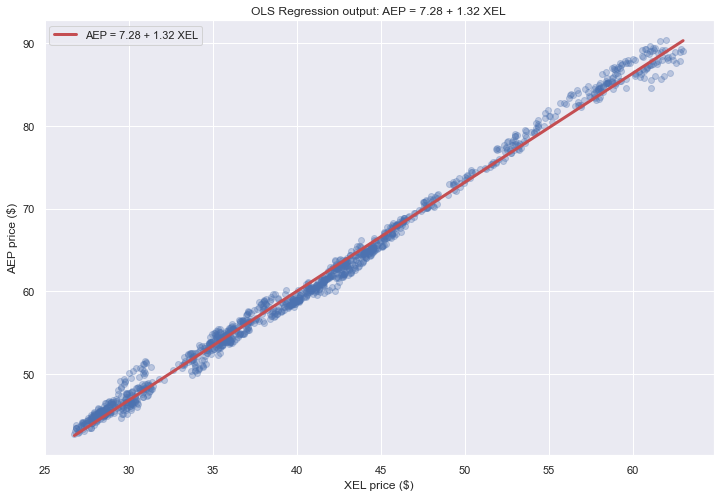

In [10]:
def OLS_linear_reg(X, Y):
    
    # running the linear regression
    X1 = sm.add_constant(X)                               # add a constant (1) column to X
    model = sm.OLS(Y, X1).fit()                           # run the regression and store the output
    a = model.params[0]                                   # constant
    b = model.params[1]                                   # slope

    # plot results of regression
    X2 = np.linspace(X.min(), X.max(), 1000)              # x value range
    Y_hat = X2 * b + a                                    # Y = a + bX
    plt.figure(figsize = (12, 8))
    plt.scatter(X, Y, alpha = 0.3)                        # plot the raw data and regression line
    plt.plot(X2, Y_hat, 'r', linewidth = 3, label = f"{stock_2} = {a:.2f} + {b:.2f} {stock_1}")
    plt.xlabel(f'{stock_1} price ($)')
    plt.ylabel(f'{stock_2} price ($)')
    plt.title(f"OLS Regression output: {stock_2} = {a:.2f} + {b:.2f} {stock_1}")
    plt.legend();
    
    return model

OLS_output = OLS_linear_reg(price_data_df[stock_1], price_data_df[stock_2])      # call the OLS function
print(OLS_output.summary())

In [11]:
# Check for homoskedasticity using breusch-pagan test
# p-value of breusch pagan test
# stats.diagnostic.het_breuschpagan(model.resid, sm.add_constant(price_data_df[stock_1]))[1]

OLS Regression results analysis (refer to <a href='#Underlying theory'>Underlying theory</a> section for more information) - 
1. Both intercept and slope (XEL) are significant
2. The model *seems* to fit well
3. Jarque-Bera test implies that errors are not normally distributed, but we will not concern much about it since our sample size is large
4. We need not worry about the stationarity assumption because our series are co-integrated
5. Durbin-watson statistic implies positive auto-correlation in the errors. This makes standard errors unreliable (but coeff are still unbiased)

Since coefficients are still unbiased and the model *seems* to be doing a decent job, we will continue with the coefficient estimates returned by our OLS


Our **hedge ratio** $(n)$ as per the OLS regression is ~ $1.32$. Therefore, for every $1$ AEP stock bought we will have to short $1.32$ XEL stock.

In [12]:
n_hedge = OLS_output.params[1]
print(f"Hedge ratio = {n_hedge:.2f}")

Hedge ratio = 1.32


### Spread calculation

Now we will calculate the spread and plot it to assess the pricing mismatch.

Spread = AEP - 1.32 XEL *(this is also equal to residual of our OLS output)*

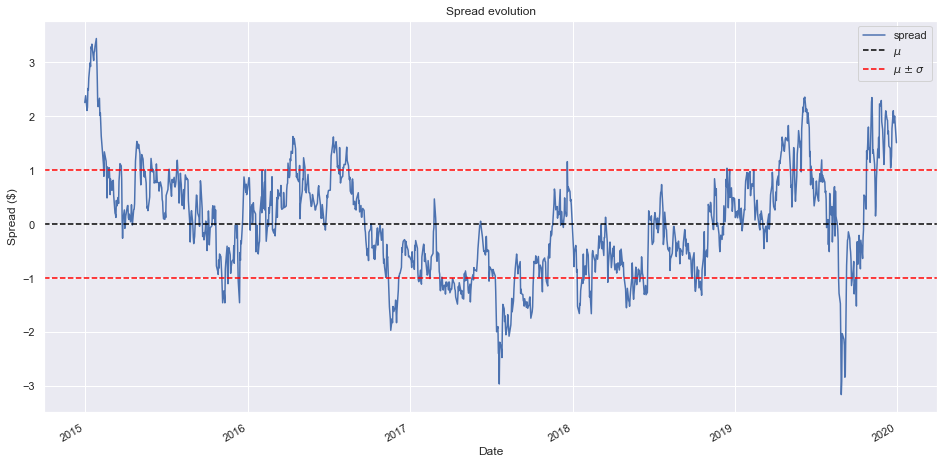

In [13]:
# spread = residuals of OLS
spread = OLS_output.resid

# plot the spread
plt.figure(figsize = (16, 8))

spread.plot(label = "spread")  
plt.axhline(spread.mean(), color = 'black', linestyle = '--', label = "$\mu$")
plt.axhline(spread.std(), color = 'red', linestyle = '--', label = "$\mu$ $\pm$ $\sigma$")
plt.axhline(-spread.std(), color = 'red', linestyle = '--')

plt.ylabel("Spread ($)")
plt.xlabel("Date")
plt.title("Spread evolution")
plt.legend();

### Sanity check - Spread's stationarity using ADF test

We will do a sanity check on spread's stationarity using ADF test.

In [14]:
# conduct Augmented Dickey-Fuller test

adf = tsa.stattools.adfuller(spread)
p_value = adf[1]

print(f"p-value = {p_value:.3f}")

if p_value < 0.05:
    print("Spread is likely stationary")
else:
    print("Spread is likely not stationary")

p-value = 0.000
Spread is likely stationary


### Dynamic hedge ratio and dynamic spread - Using continuously updated statistics
As discussed in <a href='#Underlying theory'>Underlying theory</a> section we will use - 
1. **Rolling** OLS regression to continually update our **hedge ratio** and subsequently **spread** also becomes dynamic
2. **Moving averages** of this dynamic spread while calculating rolling **z-score**

We will use rolling window = $21$ because in a month there are $21$ **trading days**.

Below is the code for - 
1. Rolling OLS regression
2. Dynamic spread computation from parameters of rolling regression

In [15]:
rolling_window = 21

In [16]:
# 1. code for rolling OLS regression

def roll_OLS(X, Y, window):
    
    # run rolling regression from statsmodels
    roll_ols = regression.rolling.RollingOLS(Y, sm.add_constant(X), window = window).fit()
    
    # return model
    return roll_ols

rolling_ols = roll_OLS(price_data_df[stock_1], price_data_df[stock_2], rolling_window)

# save parameters of rolling OLS
rolling_params = rolling_ols.params
dynamic_hedge = rolling_params[stock_1]

rolling_params.head().append(rolling_params.tail())

,const,XEL
Date,,
2014-12-31,NaN,NaN
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2019-12-23,20.750451,1.121204
2019-12-24,18.518364,1.158525
2019-12-26,15.822353,1.203637
2019-12-27,12.494878,1.258917


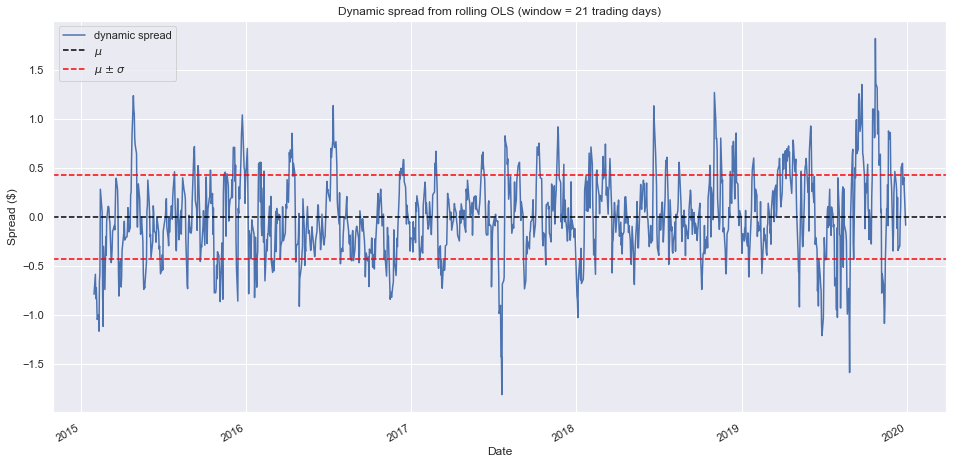

In [17]:
# 2. code for dynamic spread from parameters of rolling regression

# dynamic spread calculation
dynamic_spread = price_data_df[stock_2] - price_data_df[stock_1] * dynamic_hedge - rolling_params['const']

# plot the dynamic spread
plt.figure(figsize = (16, 8))

dynamic_spread.plot(label = "dynamic spread")
plt.axhline(dynamic_spread.mean(), color = 'black', linestyle = '--', label = "$\mu$")
plt.axhline(dynamic_spread.std(), color = 'red', linestyle = '--', label = "$\mu$ $\pm$ $\sigma$")
plt.axhline(-dynamic_spread.std(), color = 'red', linestyle = '--')

plt.ylabel("Spread ($)")
plt.xlabel("Date")
plt.title(f"Dynamic spread from rolling OLS (window = {rolling_window} trading days)")
plt.legend();

### Finally! our trading signal $-$ *rolling z-score of dynamic spread*

The absolute dynamic spread isn't very useful in statistical terms. It is more helpful to normalize our dynamic spread by treating it as a **z-score**. In practice, this is usually done to standardize the data. 

We will use rolling $z$-score of the dynamic spread with rolling window = $21$ as our final trading signal.
* 21 day Moving Average of dynamic spread: Measure of rolling mean of dynamic spread
* 1 day Moving Average of dynamic spread: Measure of current value of dynamic spread
* 21 day Standard Deviation of dynamic spread: Measure of rolling standard deviation of dynamic spread
* rolling $z$-score: $\frac{(1d MA — 21d MA)}{60d SD}$

Below is the code for - 
1. Calculating rolling z-score of a series with given rolling window
2. plot for our trading signal (rolling $z$-score of dynamic spread)

In [18]:
# 1. code for rolling z-score computation

def rolling_z_score(series, window):
    return (series - series.rolling(window = window).mean()) / series.rolling(window = window).std()

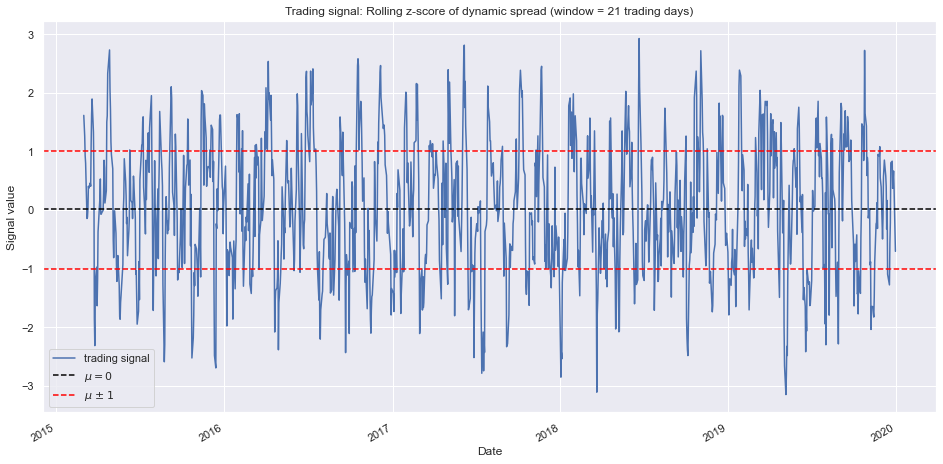

In [19]:
# 2. code for our trading signal (rolling z-score of dynamic spread)

# trading signal
signal = rolling_z_score(dynamic_spread, rolling_window)

# plot the signal
plt.figure(figsize = (16, 8))

signal.plot(label = "trading signal")
plt.axhline(signal.mean(), color = 'black', linestyle = '--', label = "$\mu = 0$")
plt.axhline(1, color = 'red', linestyle = '--', label = "$\mu$ $\pm$ $1$")
plt.axhline(-1, color = 'red', linestyle = '--')

plt.ylabel("Signal value")
plt.xlabel("Date")
plt.title(f"Trading signal: Rolling z-score of dynamic spread (window = {rolling_window} trading days)")
plt.legend();

### Final check before we trade - verify trading signal's stationarity

From above graph, our trading signal looks stationary and mean reverting. Let's confirm this with a statistical test - ADF test.

In [20]:
# conduct Augmented Dickey-Fuller test on signal

adf = tsa.stattools.adfuller(signal[40:])   # series undergoing ADF test cannot have NaNs
p_value = adf[1]

print(f"p-value = {p_value:.3f}")

if p_value < 0.05:
    print("Signal is likely stationary")
else:
    print("Signal is likely not stationary")

p-value = 0.000
Signal is likely stationary


Our signal has been tested as likely stationary. We now move to our next and final step!

## 3. Results and conclusion
<a id='Results and conclusion'></a>

### Generate long-short prompts from our trading signal using an algorithm / criterion

Following is our trading algorithm / criterion:
1. Go long on the dynamic spread when the signal is below $-2.0$. We do this by longing AEP (Y) and shorting $n$ (dynamic hedge ratio) of XEL (X)
2. Short the dynamic spread when the signal is above $+2.0$. We do this by shorting AEP (Y) and longing $n$ of XEL (X)
3. Exit the positions when the signal approaches zero

Below is the code:

In [21]:
# code for generating prompts about when to long and short AEP and XEL with appropriate (dynamic) hedge ratio

# code for condition to enter a trade based on (trading) signal

def enter(x):
    if x < -2.0:
        return 1
    elif x > 2.0:
        return -1
    else:
        return 0

# a DataFrame 'trade' to store all our data regarding position, prices, signal, entry, exit etc.

trade = pd.DataFrame()

trade[stock_1] = price_data_df[stock_1]         # XEL share price
trade[stock_2] = price_data_df[stock_2]         # AEP share price
trade['signal'] = signal                        # trading signal
trade['dynamic hedge'] = dynamic_hedge          # store dynamic hedge ratio 
trade = trade.dropna()                          # drop NaN rows
trade['breach'] = trade['signal'].apply(enter)  # notify if signal breached our bounds
trade['prompt'] = trade['breach'].diff()        # take first order difference to get the positions
trade['prompt'][0] = trade['breach'][0]         # manually set value for row 1 since can't take diff at row 1
trade[f"{stock_2} trade"] = trade['prompt']     # long or short 1 lot of AEP stock as per position required
trade[f"{stock_1} trade"] = 0.0                 # initialize XEL position column

# function to calculate appropriate quantity to long or short XEL depending 
# ... on past position and current dynamic hedge ratio

for x in range(len(trade[f"{stock_1} trade"])):
    if x == 0:                                  # for first row = -1 * AEP position * dynamic hedge ratio
        trade[f"{stock_1} trade"][x] = trade['dynamic hedge'][x] * trade['prompt'][x] * -1
    elif x > 0:                                 # if not first row
        if trade['prompt'][x] == 0:             # if trading signal not out of bounds ...
            trade[f"{stock_1} trade"][x] = 0    # ... then don't take any new positions
        else:                                 
            # if net position till date = 0
            if np.sum(trade[f"{stock_1} trade"][:x]) == 0:
                # take position as per current dynamic hedge ratio
                trade[f"{stock_1} trade"][x] = trade['dynamic hedge'][x] * trade['prompt'][x] * -1
            else:
                # exit old positions
                trade[f"{stock_1} trade"][x] = -np.sum(trade[f"{stock_1} trade"][:x])

trade.head(20)

<ipython-input-21-4b64f5d550e9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['prompt'][0] = trade['breach'][0]         # manually set value for row 1 since can't take diff at row 1
<ipython-input-21-4b64f5d550e9>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade[f"{stock_1} trade"][x] = trade['dynamic hedge'][x] * trade['prompt'][x] * -1
<ipython-input-21-4b64f5d550e9>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,XEL,AEP,signal,dynamic hedge,breach,prompt,AEP trade,XEL trade
Date,,,,,,,,
2015-03-02,28.302641,45.208252,1.612196,1.846489,0,0.0,0.0,-0.000000
2015-03-03,28.532946,45.675232,1.438737,1.800578,0,0.0,0.0,0.000000
2015-03-04,28.442471,45.554451,1.259349,1.720351,0,0.0,0.0,0.000000
2015-03-05,28.730352,45.957020,0.924998,1.667553,0,0.0,0.0,0.000000
2015-03-06,27.677540,44.290398,0.795821,1.577786,0,0.0,0.0,0.000000
2015-03-09,28.031216,44.427277,-0.146055,1.540892,0,0.0,0.0,0.000000
2015-03-10,28.097015,44.491676,-0.123973,1.567047,0,0.0,0.0,0.000000
2015-03-11,27.842030,44.097157,0.020018,1.608608,0,0.0,0.0,0.000000
2015-03-12,28.335537,45.063332,0.402546,1.603786,0,0.0,0.0,0.000000


For a better understanding on what's happening - when we are taking which positions, we will plot the above tabular data.

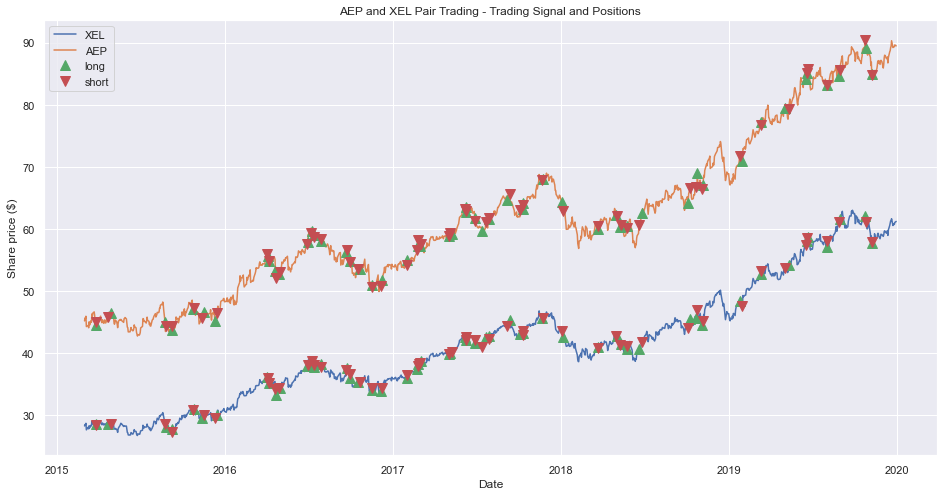

In [22]:
# visualize trading signal and positions

plt.figure(figsize = (16, 8))

# plot our pair components stock price
plt.plot(trade[stock_1], label = stock_1)
plt.plot(trade[stock_2], label = stock_2)

# plot when we are going long and short

# long AEP
plt.plot(trade[stock_2][trade[f"{stock_2} trade"] == 1], lw = 0, marker = '^', 
              markersize = 10, c = 'g', alpha = 1, label = "long")

# short AEP
plt.plot(trade[stock_2][trade[f"{stock_2} trade"] == -1], lw = 0, marker = 'v',
              markersize = 10, c = 'r', alpha = 1, label = "short")

# long XEL (when shorting AEP)
plt.plot(trade[stock_1][trade[f"{stock_2} trade"] == -1], lw = 0, marker = '^',
               markersize = 10, c = 'g', alpha = 1)

# short XEL (when long on AEP)
plt.plot(trade[stock_1][trade[f"{stock_2} trade"] == 1], lw = 0, marker = 'v',
               markersize = 10, c = 'r', alpha = 1)

plt.xlabel('Date')
plt.ylabel('Share price ($)')
plt.legend()
plt.title(f'{stock_2} and {stock_1} Pair Trading - Trading Signal and Positions');

### Conclusion

1. In this notebook, we went through the underlying theory for a stock pairs trading strategy and implemented it
2. A pairs trading algorithm looks to statistically find mispricing / arbitrage opportunities between similar and related group of assets
3. Used co-integration to find pair; spread as measure of mispricing; rolling OLS for dynamic hedge ratio and spread; rolling $z$-score as strategy
4. There are many other variations / implementations of a pairs trading strategy
5. Pairs trading is widely used by market participants and can result in good profit stream if implemented properly
6. The strategy might look promising. However, there are many other things to consider before we deploy it in real world trading

In the next and final section we list few of many considerations and scope of improvements pertaining to a pairs trading strategy.

## 4. Further considerations
<a id='Further considerations'></a>

In actual implementation of this strategy, we need to account for many other factors and issues which we have dropped here to avoid complications.

1. Here we went through some simple approaches. In practice, market participants will use more sophisticated statistics and additional datasets
2. We can make our strategy more robust by adding more advanced algorithms and extra features like **stop loss** to limit our **maximum drawdown** 
3. In reality, one would trade multiple pairs at once. This creates a diversified portfolio to mitigate the risk of individual pairs falling out of co-integration
4. If we find a good pair relationship by analyzing data, there is no guarantee that that relationship will continue into the future
5. We have not accounted for costs related to trading, market **slippage**, **liquidity** and security borrowing
6. In real trading, the strategy would be implemented in **C++** instead of **Python** due to **latency** concerns
7. In addition to low latency, fast access to exchanges is also needed (especially in **HFT**) which is generally not feasible for retail traders
8. Check if all assumptions about models being used and hypothesis tests are satisfied in order to get reliable coefficients and make valid inferences

The above list is not exhaustive by any means. We have to consider many other factors (some unknown!) before implementing the strategy in real world.